### <font color='#556b2f'> CS6301.010: Machine Learning for Engineers and Scientists (Spring '19) </font>
_**Instructor**: Gautam Kunapuli_ <br>
_**Due**: In class, **February 25 (Monday)**_

---

# **_Homework 2_**

The report component of this assignment is the **hard copy** of this homework, along with your answers to questions, and is **due at the start of class on <font color='#556b2f'>Monday, February 25, 2019</font>**.

The **electronic version** of this homework **must be uploaded on eLearning by <font color='#556b2f'>9:59am Central Standard Time, Monday, February 25, 2019</font>**. All deadlines are hard and without exceptions unless permission was obtained from the instructor **in advance**. 

You may work in groups to discuss the problems and work through solutions together. However, you must **write up your solutions on your own**, without copying another student's work or letting another student copy your work. In your solution for each problem, you must write down the names of your partner (if any); this will not affect your grade. 

---

# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [26]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(42)
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [11]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

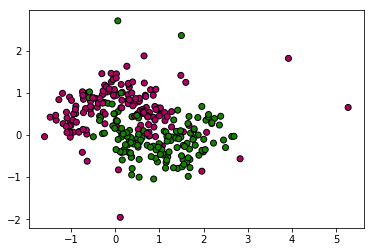

In [12]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

Based on least validation error, the best value of C would be 1000.0  with validation error 0.1720885325527015 and the corresponding model has accuracy 65.0 %


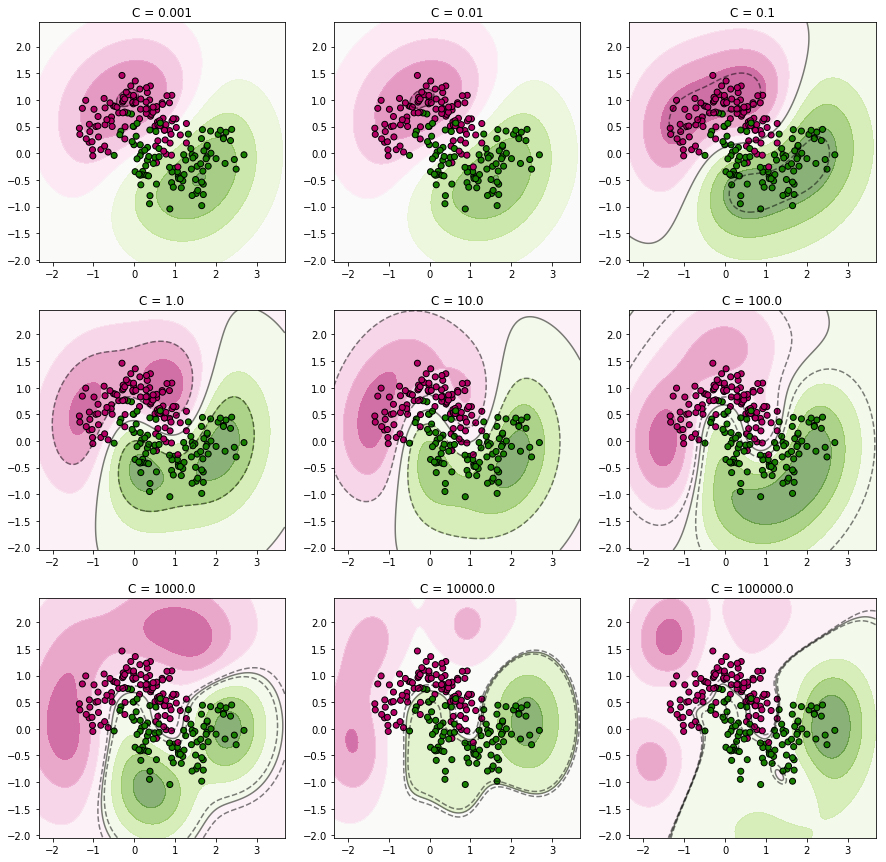

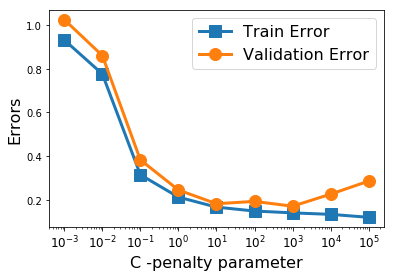

In [27]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)
C_models = dict()
C_trnErr = dict()
C_valErr = dict()
C_tstErr = dict()
#import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import hinge_loss
for C in C_values:
  C_models[C]=SVC(C,gamma='scale')
  C_models[C].fit(X_trn,y_trn)
  #w=models[C].get_params()
  C_trnErr[C]=hinge_loss(y_trn,C_models[C].decision_function(X_trn))
  C_valErr[C]=hinge_loss(y_val,C_models[C].decision_function(X_val))
  
  #hinge_trn = (np.ones(len(y_trn)) - np.multiply(y_trn,models[C].decision_function(X_trn)))
  #te = [max(0,h) for h in hinge_trn]
  #trnErr[C] = sum(te)
  #hinge_val = (np.ones(len(y_val)) - np.multiply(y_val,models[C].decision_function(X_val)))
  #ve = [max(0,h) for h in hinge_val]
  #valErr[C] = sum(ve)

#print(C_trnErr)
#print(C_valErr)

visualize(C_models, 'C', X_trn, y_trn)
plt.figure()
plt.semilogx(C_trnErr.keys(), C_trnErr.values(), marker='s', linewidth=3, markersize=12)
plt.semilogx(C_valErr.keys(), C_valErr.values(), marker='o', linewidth=3, markersize=12)
plt.xlabel('C -penalty parameter', fontsize=16)
plt.ylabel('Errors', fontsize=16)
plt.xticks(list(C_valErr.keys()), fontsize=12)
plt.legend([ 'Train Error','Validation Error'], fontsize=16)

# Insert your code here to perform model selection
C_minvalerr = min(C_valErr.values())
for C in C_values:
    if C_valErr[C]== C_minvalerr:
        C_best = C
print('Based on least validation error, the best value of C would be',C_best,' with validation error',C_minvalerr,'and the corresponding model has accuracy',100*C_models[C].score(X_tst,y_tst),'%')

---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

Based on least validation error, the best value of gamma would be 1.0  with validation error 0.17312453018008142 and the corresponding model has accuracy 66.66666666666666 %


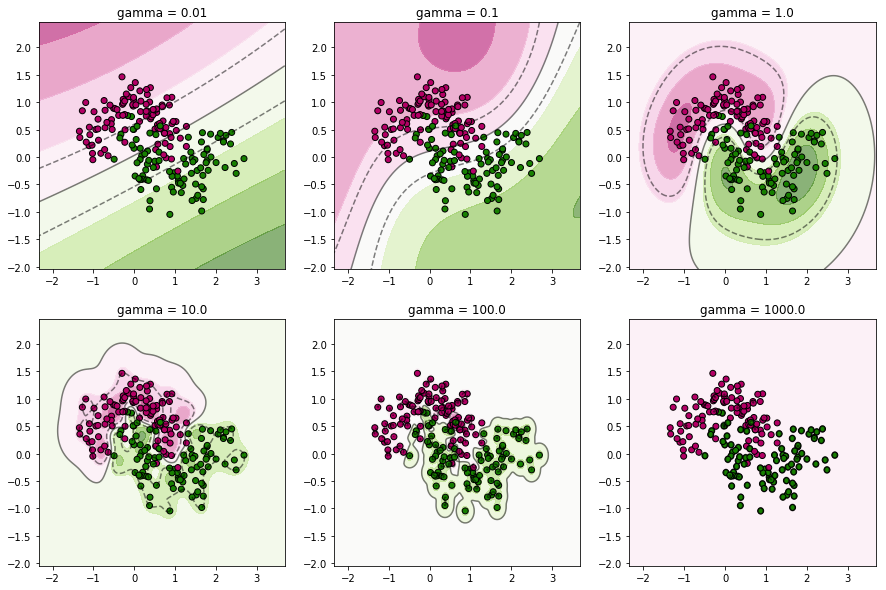

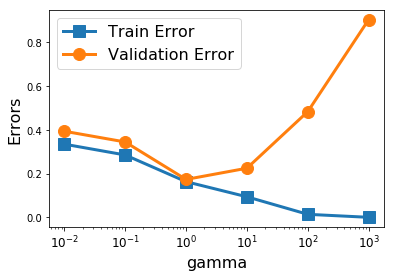

In [28]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

G_models = dict()
G_trnErr = dict()
G_valErr = dict()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

for G in gamma_values:
    G_models[G]=SVC(C=10,gamma=G)
    G_models[G].fit(X_trn,y_trn)
    G_trnErr[G]=hinge_loss(y_trn,G_models[G].decision_function(X_trn))
    G_valErr[G]=hinge_loss(y_val,G_models[G].decision_function(X_val))
    
    #w=models[G].get_params()
    #hinge_trn = (np.ones(len(y_trn)) - np.multiply(y_trn,models[G].decision_function(X_trn)))
    #te = [max(0,h) for h in hinge_trn]
    #trnErr[G] = sum(te)
    #hinge_val = (np.ones(len(y_val)) - np.multiply(y_val,models[G].decision_function(X_val)))
    #ve = [max(0,h) for h in hinge_val]
    #valErr[G] = sum(ve)

visualize(G_models, 'gamma', X_trn, y_trn)
#print(trnErr)
#print(valErr)

plt.figure()
plt.semilogx(G_trnErr.keys(), G_trnErr.values(), marker='s', linewidth=3, markersize=12)
plt.semilogx(G_valErr.keys(), G_valErr.values(), marker='o', linewidth=3, markersize=12)
plt.xlabel('gamma', fontsize=16)
plt.ylabel('Errors', fontsize=16)
plt.xticks(list(G_valErr.keys()), fontsize=12)
plt.legend([ 'Train Error','Validation Error'], fontsize=16)

# Insert your code here to perform model selection
G_minvalerr = min(G_valErr.values())
for G in gamma_values:
    if G_valErr[G]== G_minvalerr:
        gamma_best = G
print('Based on least validation error, the best value of gamma would be',gamma_best,' with validation error',G_minvalerr,'and the corresponding model has accuracy',100*C_models[G].score(X_tst,y_tst),'%')

---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [29]:
y_wbcd_trn=np.loadtxt(r"wdbc_trn.csv",delimiter=',')[:,0]
X_wbcd_trn=np.loadtxt(r"wdbc_trn.csv",delimiter=',')[:,1:]
y_wbcd_val=np.loadtxt(r"wdbc_val.csv",delimiter=',')[:,0]
X_wbcd_val=np.loadtxt(r"wdbc_val.csv",delimiter=',')[:,1:]
y_wbcd_tst=np.loadtxt(r"wdbc_tst.csv",delimiter=',')[:,0]
X_wbcd_tst=np.loadtxt(r"wdbc_tst.csv",delimiter=',')[:,1:]

Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [30]:
gamma_range = np.arange(-3.0, 3.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
C_range = np.arange(-2.0, 5.0, 1.0)
C_values = np.power(10.0, C_range)

BC_models = dict()
BC_trnErr = dict()
BC_valErr = dict()
BC_minvalerr = dict()
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC

for G in gamma_values:
    for C in C_values:
        BC_models[(G,C)]=SVC(C=C,gamma=G)
        BC_models[(G,C)].fit(X_wbcd_trn,y_wbcd_trn)
        BC_trnErr[(G,C)]=hinge_loss(y_wbcd_trn,BC_models[(G,C)].decision_function(X_wbcd_trn))
        BC_valErr[(G,C)]=hinge_loss(y_wbcd_val,BC_models[(G,C)].decision_function(X_wbcd_val))
        
BC_minvalerr = min(BC_valErr.values())
for G in gamma_values:
    for C in C_values:
        print('\n','gamma-C =',(G,C),'\n','training error',BC_trnErr[(G,C)],'\n','validation error',BC_valErr[(G,C)],'\n','accuracy',BC_models[(G,C)].score(X_wbcd_tst,y_wbcd_tst),'\n')

# Insert your code here to perform model selection

for G in gamma_values:
    for C in C_values:
        if BC_valErr[(G,C)] == BC_minvalerr:
            best_pair = (G,C)
print('Based on least validation error the best gamma-C pair is ',best_pair,'with validation error',BC_minvalerr,'and the corresponding accuracy is',100*BC_models[best_pair].score(X_wbcd_tst,y_wbcd_tst),'%')


 gamma-C = (0.001, 0.01) 
 training error 0.7208184768103563 
 validation error 0.7256813479326054 
 accuracy 0.6260869565217392 


 gamma-C = (0.001, 0.1) 
 training error 0.5179192813778993 
 validation error 0.5263786967173579 
 accuracy 0.7217391304347827 


 gamma-C = (0.001, 1.0) 
 training error 0.19672329762276422 
 validation error 0.2319876477038771 
 accuracy 0.9391304347826087 


 gamma-C = (0.001, 10.0) 
 training error 0.09701456859151125 
 validation error 0.13388256372479423 
 accuracy 0.9565217391304348 


 gamma-C = (0.001, 100.0) 
 training error 0.039733445101810476 
 validation error 0.08999117182651394 
 accuracy 0.9826086956521739 


 gamma-C = (0.001, 1000.0) 
 training error 0.017331117265180534 
 validation error 0.09480186699532406 
 accuracy 0.9565217391304348 


 gamma-C = (0.001, 10000.0) 
 training error 8.947564670306962e-06 
 validation error 0.11207298877748234 
 accuracy 0.9391304347826087 


 gamma-C = (0.01, 0.01) 
 training error 0.619344850925874

---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points. 

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

Based on least validation error, the best value of k is 11 with validation error 4.47213595499958 and the corresponding accuracy is 96.52173913043478 %


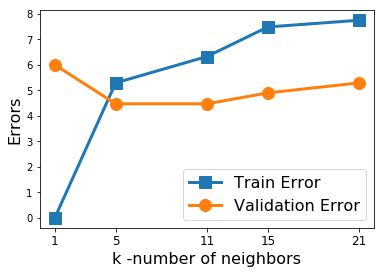

In [31]:
knn_models=dict()
knn_trnErr = dict()
knn_valErr = dict()
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
for k in (1,5,11,15,21):
    knn_models[k] = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    knn_models[k].fit(X_wbcd_trn,y_wbcd_trn)
    knn_trnErr[k] = distance.euclidean(y_wbcd_trn,knn_models[k].predict(X_wbcd_trn))
    knn_valErr[k] = distance.euclidean(y_wbcd_val,knn_models[k].predict(X_wbcd_val))
plt.figure()
plt.plot(knn_trnErr.keys(), knn_trnErr.values(), marker='s', linewidth=3, markersize=12)
plt.plot(knn_valErr.keys(), knn_valErr.values(), marker='o', linewidth=3, markersize=12)
plt.xlabel('k -number of neighbors', fontsize=16)
plt.ylabel('Errors', fontsize=16)
plt.xticks(list(knn_valErr.keys()), fontsize=12)
plt.legend([ 'Train Error','Validation Error'], fontsize=16)
    
knn_minvalerr = min(knn_valErr.values())
for k in (1,5,11,15,21):
    if knn_valErr[k]== knn_minvalerr:
        k_best = k
print('Based on least validation error, the best value of k is',k_best,'with validation error',knn_minvalerr,'and the corresponding accuracy is',100*knn_models[k].score(X_wbcd_tst,y_wbcd_tst),'%')

**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.